<a href="https://colab.research.google.com/github/canimzali/Python_project/blob/main/audi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!pip install yfinance
!pip install missingno
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
import matplotlib.pyplot as plt
import yfinance as yf
import missingno as msn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('audi.csv')
df.head(5)

,index,Year,Type,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),href,PPY,MileageRank,PriceRank,PPYRank,Score
0,0,2018.0,Hatchback,44000.0,1.6L,114.398422,Manual,Diesel,1,14995.0,https://www.autotrader.co.uk/car-details/20221...,2499.166667,215,163,340,718
1,4,2016.0,Hatchback,42596.0,1.0L,93.688363,Manual,Petrol,3,10755.0,https://www.autotrader.co.uk/car-details/20221...,2688.750000,222,330,276,828
2,7,2015.0,Hatchback,42700.0,1.4L,123.274162,Manual,Petrol,2,10799.0,https://www.autotrader.co.uk/car-details/20221...,3599.666667,221,327,94,642
3,11,2014.0,Hatchback,86000.0,1.6L,103.550296,Manual,Diesel,3,7490.0,https://www.autotrader.co.uk/car-details/20221...,3745.000000,41,449,83,573
4,12,2014.0,Hatchback,104310.0,1.6L,103.550296,Manual,Diesel,3,7400.0,https://www.autotrader.co.uk/car-details/20220...,3700.000000,12,452,85,549


In [ ]:
df=df.drop(columns=["index","href","PriceRank"])

In [ ]:
df['Engine']=df['Engine'].str.replace("L","")


AttributeError: Can only use .str accessor with string values!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              471 non-null    float64
 1   Type              471 non-null    object 
 2   Mileage(miles)    471 non-null    float64
 3   Engine            471 non-null    float64
 4   PS                471 non-null    float64
 5   Transmission      471 non-null    object 
 6   Fuel              471 non-null    object 
 7   Number_of_Owners  471 non-null    int64  
 8   Price(£)          471 non-null    float64
 9   PPY               471 non-null    float64
 10  MileageRank       471 non-null    int64  
 11  PPYRank           471 non-null    int64  
 12  Score             471 non-null    int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 48.0+ KB


In [ ]:
df.describe()


,Year,Mileage(miles),Engine,PS,Number_of_Owners,Price(£),PPY,MileageRank,PPYRank,Score
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,2016.970276,44892.783439,1.301274,116.682559,1.785563,13935.070064,3048.577682,235.000000,235.000000,705.000000
std,2.208101,27020.236124,0.248567,17.345034,0.886473,4955.040914,896.647265,136.110249,136.110249,139.228925
min,2014.000000,9.000000,1.000000,84.812623,1.000000,5000.000000,1682.333333,0.000000,0.000000,299.000000
25%,2015.000000,24902.000000,1.000000,103.550296,1.000000,10286.500000,2481.666667,117.500000,117.500000,595.000000
50%,2017.000000,40236.000000,1.400000,114.398422,2.000000,12495.000000,2800.000000,235.000000,235.000000,704.000000
75%,2019.000000,61770.500000,1.500000,123.274162,2.000000,17495.000000,3342.400000,352.500000,352.500000,809.000000
max,2022.000000,149000.000000,2.000000,197.238659,7.000000,30450.000000,7375.000000,470.000000,470.000000,1034.000000


<Axes: >

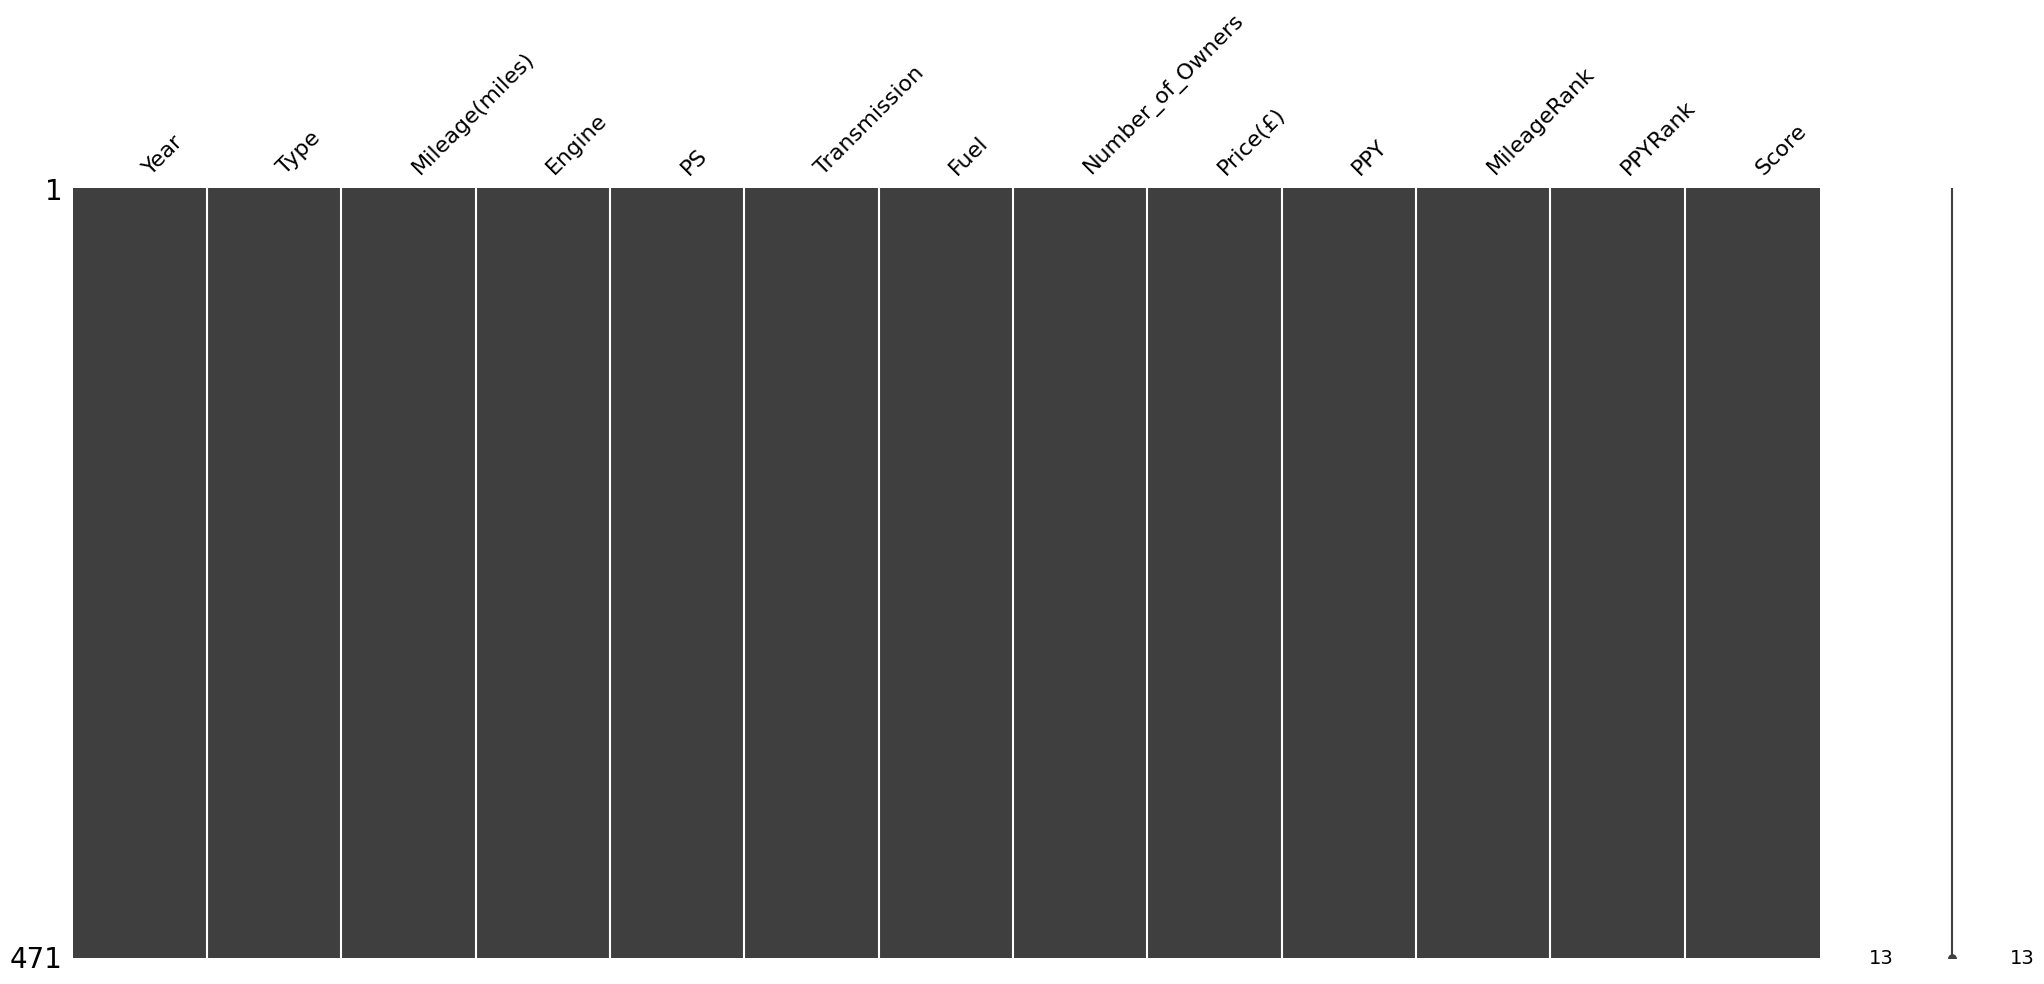

In [ ]:
msn.matrix(df)

In [ ]:
df.head(3)


,Year,Type,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),PPY,MileageRank,PPYRank,Score
0,2018.0,Hatchback,44000.0,1.6,114.398422,Manual,Diesel,1,14995.0,2499.166667,215,340,718
1,2016.0,Hatchback,42596.0,1.0,93.688363,Manual,Petrol,3,10755.0,2688.750000,222,276,828
2,2015.0,Hatchback,42700.0,1.4,123.274162,Manual,Petrol,2,10799.0,3599.666667,221,94,642


In [ ]:
def a1pie(column):
    data=df[column].value_counts()
    plt.figure(figsize=(6,6))
    plt.style.use("ggplot")
    plt.pie(data.values,labels=data.index,autopct="%1.1f%%")
    plt.title(column)
    plt.show()

In [ ]:
a1pie("Year")


KeyError: 'Year'

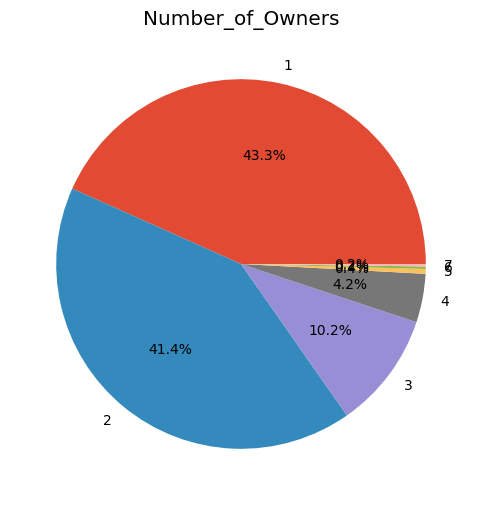

In [ ]:
a1pie("Number_of_Owners")


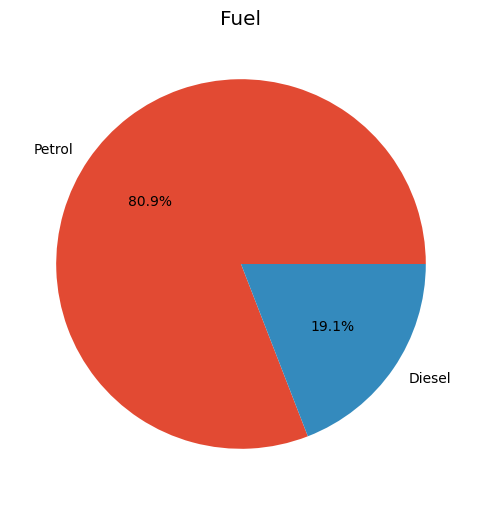

In [ ]:
a1pie("Fuel")


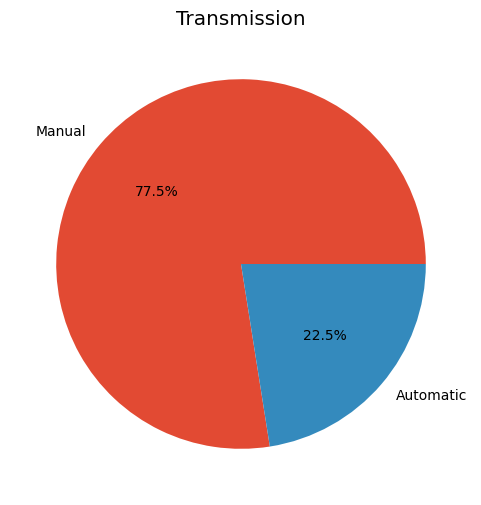

In [ ]:
a1pie("Transmission")


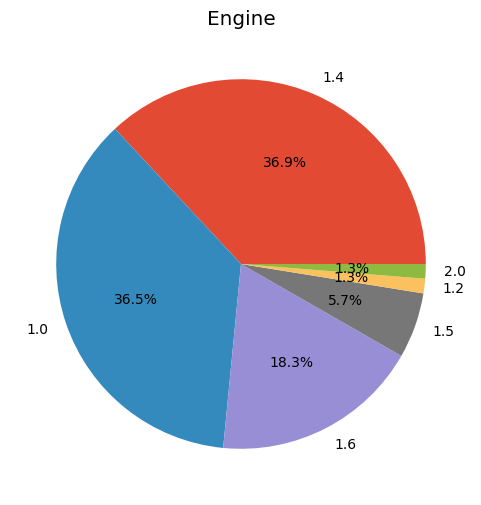

In [ ]:
a1pie("Engine")


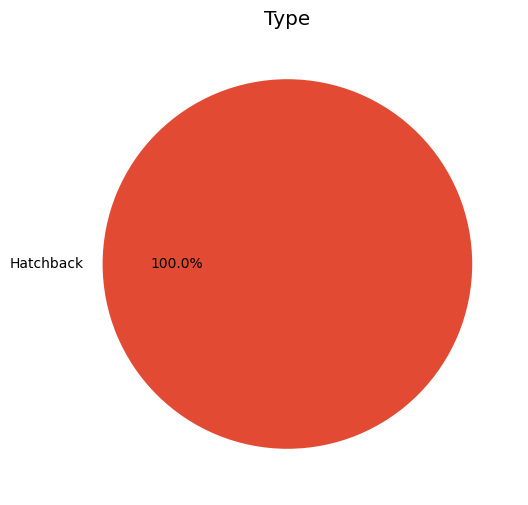

In [ ]:
a1pie("Type")


In [ ]:
df.head(3)


,Year,Type,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),PPY,MileageRank,PPYRank,Score
0,2018.0,Hatchback,44000.0,1.6,114.398422,Manual,Diesel,1,14995.0,2499.166667,215,340,718
1,2016.0,Hatchback,42596.0,1.0,93.688363,Manual,Petrol,3,10755.0,2688.750000,222,276,828
2,2015.0,Hatchback,42700.0,1.4,123.274162,Manual,Petrol,2,10799.0,3599.666667,221,94,642


In [ ]:
df=df.drop(["MileageRank", "PPYRank", "Score"], axis=1)

In [ ]:
df.columns=["yil", "kasa", "mil", "motor", "ps", "vites", "yakit", "sahip", "fiyat", "ppy"]

In [ ]:
df.head(3)

,yil,kasa,mil,motor,ps,vites,yakit,sahip,fiyat,ppy
0,2018.0,Hatchback,44000.0,1.6,114.398422,Manual,Diesel,1,14995.0,2499.166667
1,2016.0,Hatchback,42596.0,1.0,93.688363,Manual,Petrol,3,10755.0,2688.750000
2,2015.0,Hatchback,42700.0,1.4,123.274162,Manual,Petrol,2,10799.0,3599.666667


In [ ]:
df=pd.get_dummies(df, columns=["kasa", "vites", "yakit"], drop_first=True)

In [ ]:
df.head(3)

,yil,mil,motor,ps,sahip,fiyat,ppy,vites_Manual,yakit_Petrol
0,2018.0,44000.0,1.6,114.398422,1,14995.0,2499.166667,True,False
1,2016.0,42596.0,1.0,93.688363,3,10755.0,2688.750000,True,True
2,2015.0,42700.0,1.4,123.274162,2,10799.0,3599.666667,True,True


In [ ]:
y=df[["fiyat"]]
x=df.drop("fiyat", axis=1)

In [ ]:
lm=LinearRegression()
model=lm.fit(x,y)

In [ ]:
model.score(x,y)

0.9595295772839731

In [ ]:
model.predict ([ [2015, 30000,1.6,110,1,2600,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[8613.34908562]])